# Задачі:

**Створити графік лос функціїї** 

**Спробувати RMSE, MAE функції**

**Проексперементувати з нелінійними даними**

**Проексперементувати з налаштуваннями функції**

**Зробити анімацію лос функції (опціонально)**

## Маємо початкий код з наступними графіками

Optimization terminated successfully.
         Current function value: 1.024104
         Iterations: 55
         Function evaluations: 102
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.0241037044214218
             x: [ 2.001e+00  3.343e+00]
           nit: 55
          nfev: 102
 final_simplex: (array([[ 2.001e+00,  3.343e+00],
                       [ 2.001e+00,  3.342e+00],
                       [ 2.001e+00,  3.343e+00]]), array([ 1.024e+00,  1.024e+00,  1.024e+00]))
Parameters:  [2.00058069 3.3425008 ]


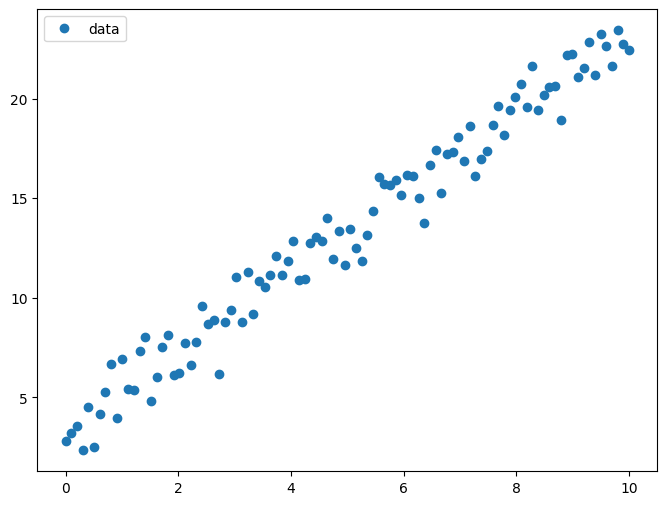

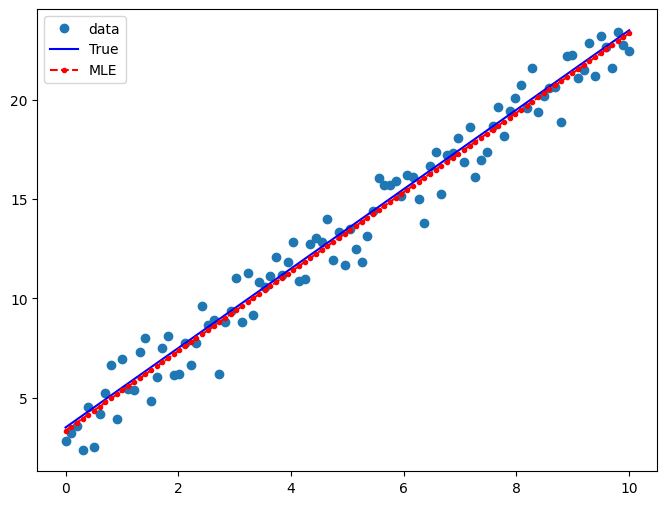

In [1]:
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


np.random.seed(1337)

def get_data(nsamples: int = 100) -> Tuple[np.array, np.array]:
    x = np.linspace(0, 10, nsamples)
    y = 2 * x + 3.5
    return (x, y)


def add_noise(y: np.array) -> np.array:
    noise = np.random.normal(size=y.size)
    return y + noise


def mse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MSE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    # Predictions
    y_hat = m * x + b
    # Get loss MSE
    mse = (np.square(y - y_hat)).mean()   
    return mse


if __name__ == "__main__":
    # Getting data
    x, y_true = get_data()
    y = add_noise(y_true)

    # Plot and investigate data
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.legend(loc="best")

    # Initial guess of the parameters: [2, 2] (m, b).
    # It doesn’t have to be accurate but simply reasonable.
    initial_guess = np.array([5, -3])

    # Maximizing the probability for point to be from the distribution
    results = minimize(
        mse_regression,
        initial_guess,
        args=(x, y,),
        method="Nelder-Mead",
        options={"disp": True},)
    print(results)
    print("Parameters: ", results.x)

    # Plot results
    xx = np.linspace(np.min(x), np.max(x), 100)
    yy = results.x[0] * xx + results.x[1]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(x, y_true, "b-", label="True")
    ax.plot(xx, yy, "r--.", label="MLE")
    ax.legend(loc="best")

## Вирішення першої задачі

Optimization terminated successfully.
         Current function value: 1.024104
         Iterations: 55
         Function evaluations: 102
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.0241037044214218
             x: [ 2.001e+00  3.343e+00]
           nit: 55
          nfev: 102
 final_simplex: (array([[ 2.001e+00,  3.343e+00],
                       [ 2.001e+00,  3.342e+00],
                       [ 2.001e+00,  3.343e+00]]), array([ 1.024e+00,  1.024e+00,  1.024e+00]))
Parameters:  [2.00058069 3.3425008 ]


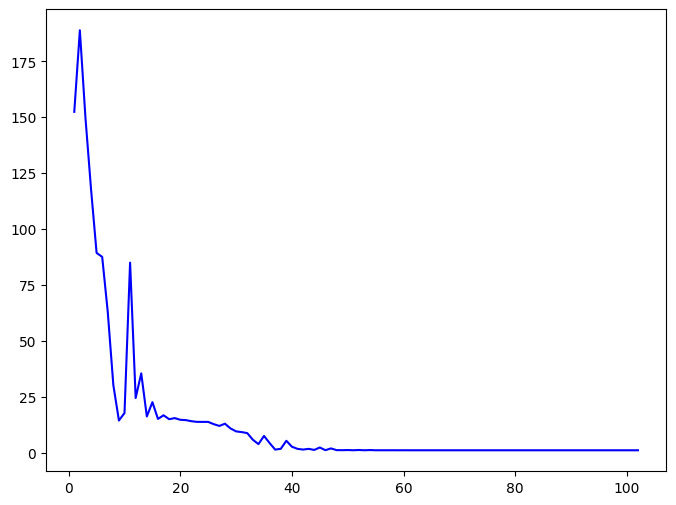

In [136]:
# Для початку треба модифікувати нашу функцію
mse_value = []

def mse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MSE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    y_hat = m * x + b
    mse = (np.square(y - y_hat)).mean()  
    mse_value.append(mse)
    return mse
results = minimize(
        mse_regression,
        initial_guess,
        args=(x, y,),
        method="Nelder-Mead",
        options={"disp": True},)
print(results)
print("Parameters: ", results.x),
mse_number = [i for i in range(1, len(mse_value)+1)]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(mse_number, mse_value, "b-", label="MSE steps")
plt.savefig("MSE_steps.png")

## Висновки першої задачі

Як можемо бачити з графіку, за 52 ітерації було зроблено 99 обчислень.

Також видно, що десь після 10 обчислення, кроки обчислень стали меншими і наближались до 0 після 40 обчислення.

Приблизно на 50, результат вже майже не відрізнити від останньої ітерації.

## Вирішення другої задачі

**RMSE**

Optimization terminated successfully.
         Current function value: 2.485312
         Iterations: 53
         Function evaluations: 102
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2.4853124180273496
             x: [ 1.986e+00  3.307e+00]
           nit: 53
          nfev: 102
 final_simplex: (array([[ 1.986e+00,  3.307e+00],
                       [ 1.986e+00,  3.307e+00],
                       [ 1.986e+00,  3.307e+00]]), array([ 2.485e+00,  2.485e+00,  2.485e+00]))
Parameters:  [1.98597268 3.30724313]


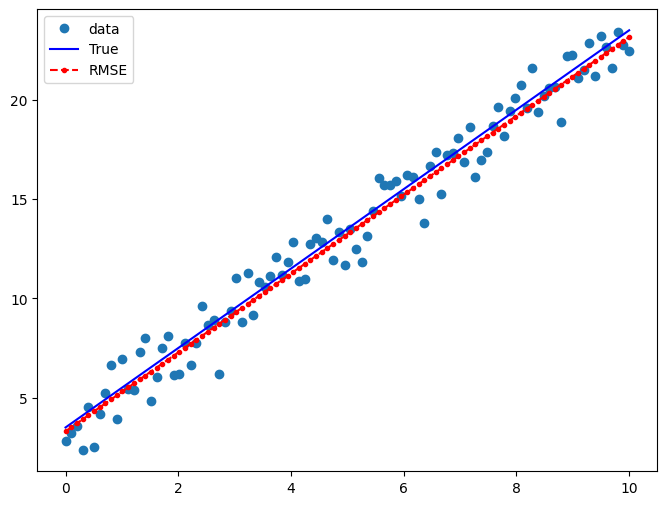

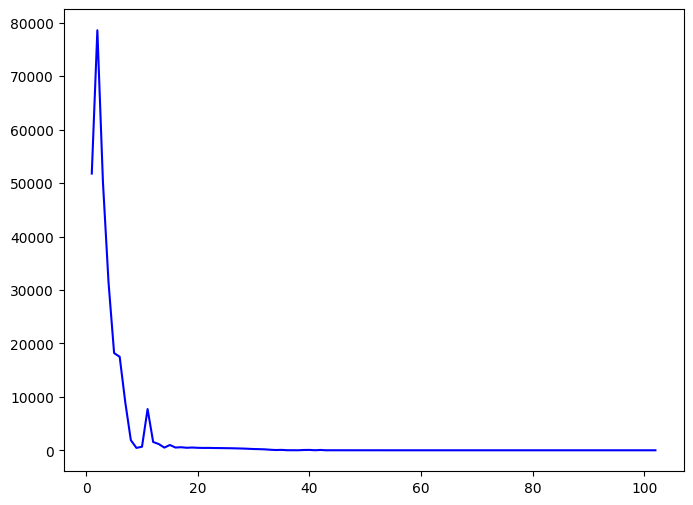

In [138]:
# Для початку треба модифікувати нашу функцію
rmse_value = []

def rmse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    m = guess[0]
    b = guess[1]
    y_hat = m * x + b
    rmse = (np.square((y_hat - y)**2)).mean()
    rmse_value.append(rmse)
    return rmse
results = minimize(
        rmse_regression,
        initial_guess,
        args=(x, y,),
        method="Nelder-Mead",
        options={"disp": True},)
print(results)
print("Parameters: ", results.x),
rmse_number = [i for i in range(1, len(rmse_value)+1)]

xx = np.linspace(np.min(x), np.max(x), 100)
yy = results.x[0] * xx + results.x[1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(xx, yy, "r--.", label="RMSE")
ax.legend(loc="best")

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(rmse_number, rmse_value, "b-", label="RMSE steps")
plt.savefig("RMSE_steps.png")

# Висновки другої задачі

**RMSE**

Як можемо бачити, RMSE дає схожі результати по обчисленю похибки.

Однак ця модель натренувалась в двічі швидше. Наближення до кінцевого результату почалось десь з 30 обчислення.

Також можемо спостерігати, що кроки обчислень на початку були значно більшими - 30000 (де у MSE - приблизно 50).

Ця модель зробила 53 ітерації та 102 обчислення.

# Задача номер два

**MAE**

Optimization terminated successfully.
         Current function value: 0.830558
         Iterations: 64
         Function evaluations: 118
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.8305578476764989
             x: [ 1.996e+00  3.505e+00]
           nit: 64
          nfev: 118
 final_simplex: (array([[ 1.996e+00,  3.505e+00],
                       [ 1.996e+00,  3.505e+00],
                       [ 1.996e+00,  3.504e+00]]), array([ 8.306e-01,  8.306e-01,  8.306e-01]))
Parameters:  [1.99623445 3.50454274]


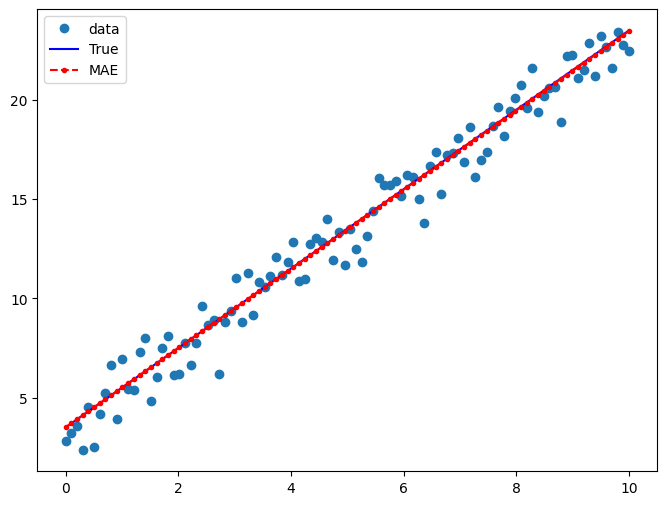

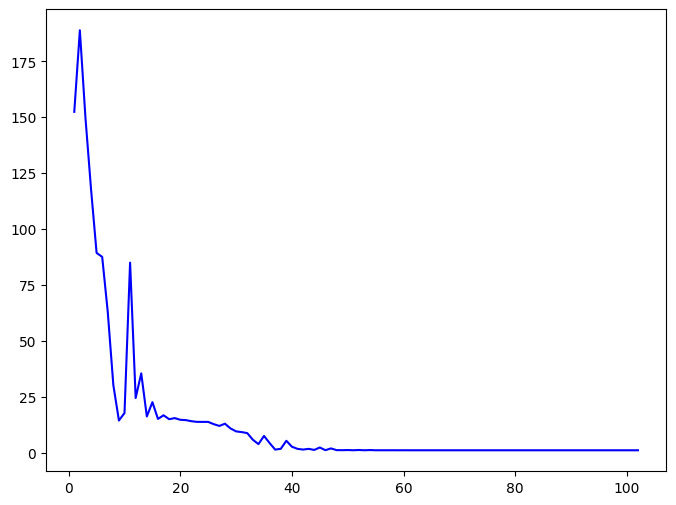

In [140]:
# Для початку треба модифікувати нашу функцію
mae_value = []

def mae_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MAE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    y_hat = m * x + b
    mae = np.absolute(y_hat - y).mean()
    mae_value.append(mae)
    return mae
results = minimize(
        mae_regression,
        initial_guess,
        args=(x, y,),
        method="Nelder-Mead",
        options={"disp": True},)
print(results)
print("Parameters: ", results.x),
mae_number = [i for i in range(1, len(mae_value)+1)]

xx = np.linspace(np.min(x), np.max(x), 100)
yy = results.x[0] * xx + results.x[1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(xx, yy, "r--.", label="MAE")
ax.legend(loc="best")

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(mse_number, mse_value, "b-", label="MAE steps")
plt.savefig("MAE_steps.png")

# Висновки другої задачі

**MAE**

Як можемо бачити, MAE дає однакові з MSE результати по обчисленю похибки.

Ця модель натренувалась повільніше як і MSE. Наближення до кінцевого результату почалось десь з 50 обчислення.

Також можемо спостерігати, що кроки обчислень на початку були як у MSE - приблизно 50.

Ця модель зробила 64 ітерації та 118 обчислення.

# Задача номер три

Експеремент функції MSE з нелінійними даними

Optimization terminated successfully.
         Current function value: 0.853246
         Iterations: 129
         Function evaluations: 225
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.8532458926477448
             x: [ 5.386e+00  9.536e-01  3.007e+00]
           nit: 129
          nfev: 225
 final_simplex: (array([[ 5.386e+00,  9.536e-01,  3.007e+00],
                       [ 5.386e+00,  9.536e-01,  3.007e+00],
                       [ 5.386e+00,  9.536e-01,  3.007e+00],
                       [ 5.386e+00,  9.536e-01,  3.007e+00]]), array([ 8.532e-01,  8.532e-01,  8.532e-01,  8.532e-01]))
Parameters:  [5.38576416 0.95359541 3.00677321]


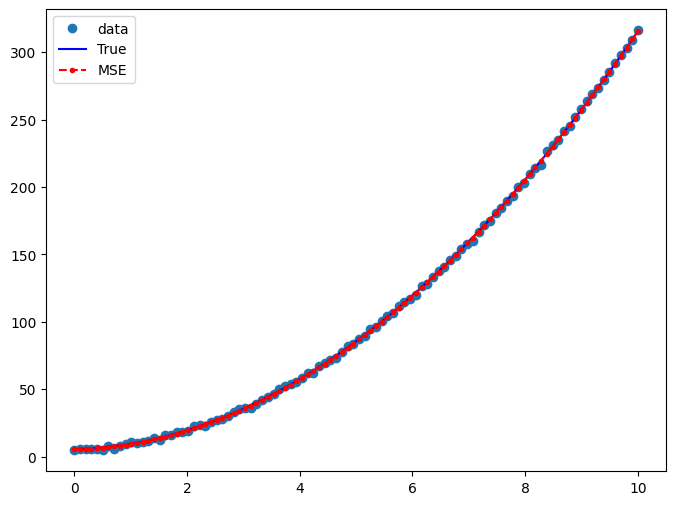

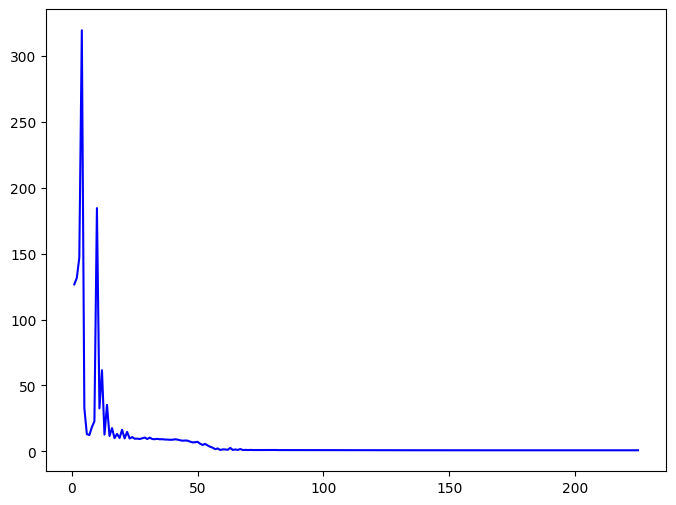

In [4]:
mse_value = []
initial_guess = np.array([5, 3, 3])

def add_noise(y: np.array) -> np.array:
    noise = np.random.normal(size=y.size)
    return y + noise
# 3 * x**2 + x + 5.5
def get_data(nsamples: int = 100) -> Tuple[np.array, np.array]:
    x = np.linspace(0, 10, nsamples)
    y = 5.5 + x + 3 * x**2
    return (x, y)
    
x, y_true = get_data()
y = add_noise(y_true)

def mse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MSE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    k = guess[2]
    y_hat = m + b * x + k * x**2 
    mse = np.square(y - y_hat).mean()  
    mse_value.append(mse)
    return mse
results = minimize(
        mse_regression,
        initial_guess,
        args=(x, y,),
        method="Nelder-Mead",
        options={"disp": True})
print(results)
print("Parameters: ", results.x)

xx = np.linspace(np.min(x), np.max(x), 100)
yy = results.x[0] + results.x[1] * xx + results.x[2] * xx ** 2

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(xx, yy, "r--.", label="MSE")
ax.legend(loc="best")

mse_number = [i for i in range(1, len(mse_value)+1)]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(mse_number, mse_value, "b-", label="MSE steps")
plt.savefig("MSE_exprmnt.png")

# Результат експеременту

З нелінійними даними функція мінімізації працює набагато довше. 

Також час її роботи дуже залежить від шуму даних. Трохи збільшивши шум, функція стає працювати помітно довше. 

Наближається до правильної відповіді доволі швидко, але потім дуже довго намагається мінімізуватись. 

# Задача номер чотири

Експеремент з налаштуваннями функції номер 1

Змінюємо кількість семплів до 1000

Optimization terminated successfully.
         Current function value: 1.016107
         Iterations: 51
         Function evaluations: 97
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.0161065807098015
             x: [ 1.985e+00  3.623e+00]
           nit: 51
          nfev: 97
 final_simplex: (array([[ 1.985e+00,  3.623e+00],
                       [ 1.985e+00,  3.623e+00],
                       [ 1.985e+00,  3.623e+00]]), array([ 1.016e+00,  1.016e+00,  1.016e+00]))
Parameters:  [1.98477991 3.62348586]


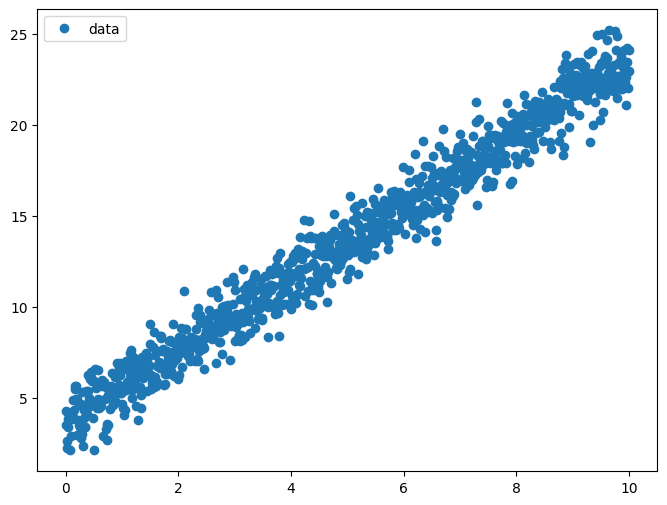

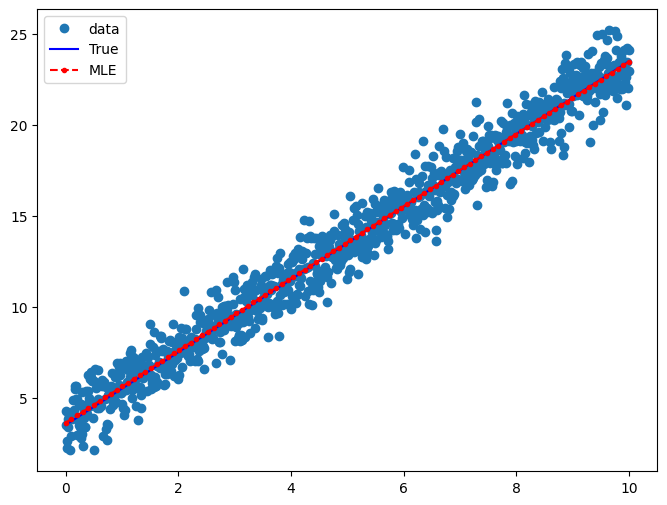

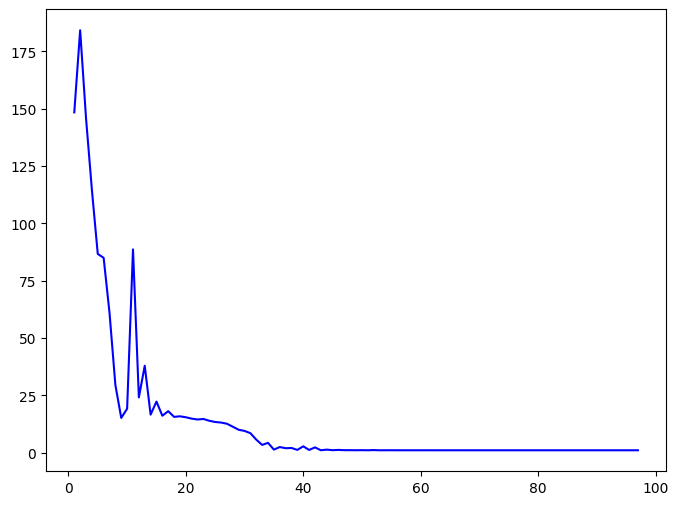

In [148]:
mse_value = []

def get_data(nsamples: int = 1000) -> Tuple[np.array, np.array]:
    x = np.linspace(0, 10, nsamples)
    y = 2 * x + 3.5
    return (x, y)


def add_noise(y: np.array) -> np.array:
    noise = np.random.normal(size=y.size)
    return y + noise


def mse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MSE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    y_hat = m * x + b
    mse = (np.square(y - y_hat)).mean()  
    mse_value.append(mse)
    return mse

if __name__ == "__main__":
    # Getting data
    x, y_true = get_data()
    y = add_noise(y_true)

    # Plot and investigate data
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.legend(loc="best")

    # Initial guess of the parameters: [2, 2] (m, b).
    # It doesn’t have to be accurate but simply reasonable.
    initial_guess = np.array([5, -3])

    # Maximizing the probability for point to be from the distribution
    results = minimize(
        mse_regression,
        initial_guess,
        args=(x, y,),
        method="Nelder-Mead",
        options={"disp": True},)
    print(results)
    print("Parameters: ", results.x)

    # Plot results
    xx = np.linspace(np.min(x), np.max(x), 100)
    yy = results.x[0] * xx + results.x[1]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(x, y_true, "b-", label="True")
    ax.plot(xx, yy, "r--.", label="MLE")
    ax.legend(loc="best")
    mse_number = [i for i in range(1, len(mse_value)+1)]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(mse_number, mse_value, "b-", label="MSE steps")
    plt.savefig("MSE_steps(1000).png")

# Результати першого тесту

Як бачиму, змінивши лише кількість семплів початкових даних, лос функція майже не відрізняється за своєю продуктивністю.

**Другий тест**

Optimization terminated successfully.
         Current function value: 0.772014
         Iterations: 64
         Function evaluations: 123
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.7720141533913594
             x: [ 2.007e+00  3.124e+00]
           nit: 64
          nfev: 123
 final_simplex: (array([[ 2.007e+00,  3.124e+00],
                       [ 2.007e+00,  3.124e+00],
                       [ 2.007e+00,  3.124e+00]]), array([ 7.720e-01,  7.720e-01,  7.720e-01]))
Parameters:  [2.0068715  3.12414536]


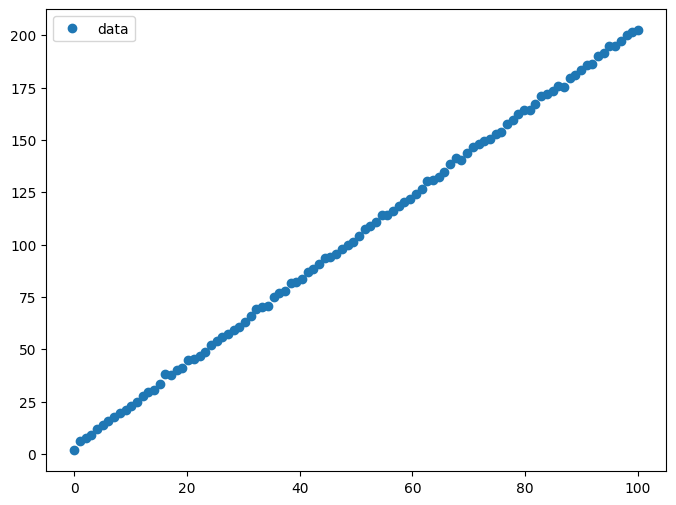

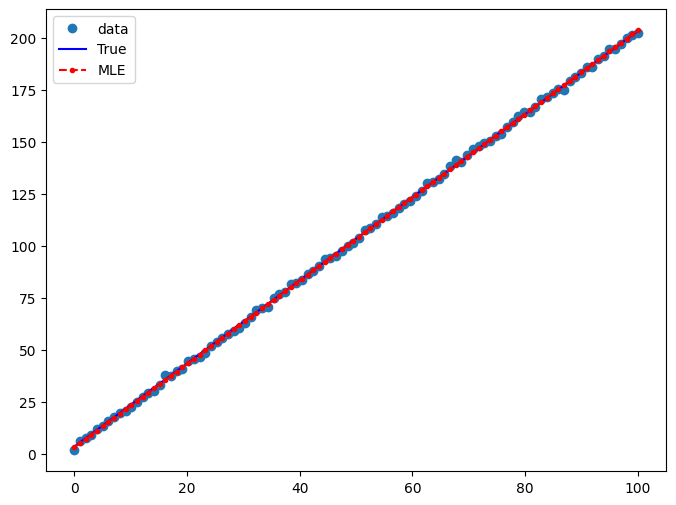

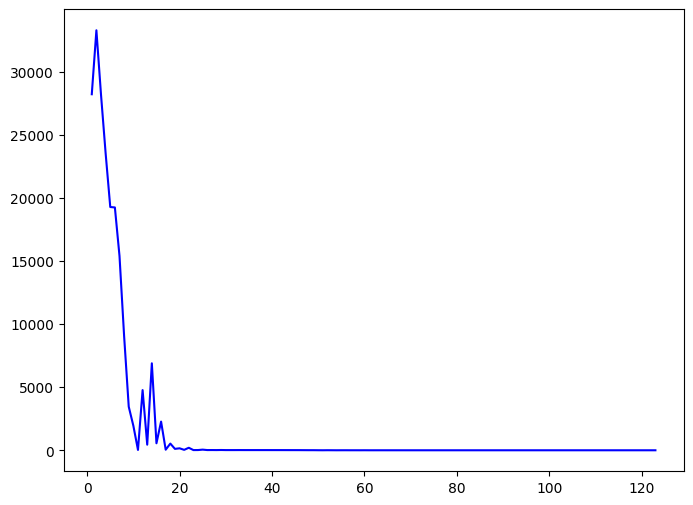

In [149]:
mse_value = []

def get_data(nsamples: int = 100) -> Tuple[np.array, np.array]:
    x = np.linspace(0, 100, nsamples)
    y = 2 * x + 3.5
    return (x, y)


def add_noise(y: np.array) -> np.array:
    noise = np.random.normal(size=y.size)
    return y + noise


def mse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MSE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    y_hat = m * x + b
    mse = (np.square(y - y_hat)).mean()  
    mse_value.append(mse)
    return mse

if __name__ == "__main__":
    # Getting data
    x, y_true = get_data()
    y = add_noise(y_true)

    # Plot and investigate data
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.legend(loc="best")

    # Initial guess of the parameters: [2, 2] (m, b).
    # It doesn’t have to be accurate but simply reasonable.
    initial_guess = np.array([5, -3])

    # Maximizing the probability for point to be from the distribution
    results = minimize(
        mse_regression,
        initial_guess,
        args=(x, y,),
        method="Nelder-Mead",
        options={"disp": True},)
    print(results)
    print("Parameters: ", results.x)

    # Plot results
    xx = np.linspace(np.min(x), np.max(x), 100)
    yy = results.x[0] * xx + results.x[1]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(x, y_true, "b-", label="True")
    ax.plot(xx, yy, "r--.", label="MLE")
    ax.legend(loc="best")
    mse_number = [i for i in range(1, len(mse_value)+1)]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(mse_number, mse_value, "b-", label="MSE steps")
    plt.savefig("MSE_steps_to100.png")

# Результат другого експеременту

За графіками можна побачити, що збільшивши розкид даних з 0-10 до 0-100, лос функція наближається до кінцевого результату більш ніж
в двічв швидше. Проте, щоб знайти мінімум, їй потрібно на 20% більше часу. Також бачимо, що перші кроки мінімізації оцінювались в десятки тисяч, проте швидко 
зменшились (до 20 обчислення).

**Третій тест**

Optimization terminated successfully.
         Current function value: 0.984435
         Iterations: 63
         Function evaluations: 120
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.9844351757073664
             x: [ 2.982e+00  1.001e+02]
           nit: 63
          nfev: 120
 final_simplex: (array([[ 2.982e+00,  1.001e+02],
                       [ 2.982e+00,  1.001e+02],
                       [ 2.982e+00,  1.001e+02]]), array([ 9.844e-01,  9.844e-01,  9.844e-01]))
Parameters:  [  2.98185992 100.1082715 ]


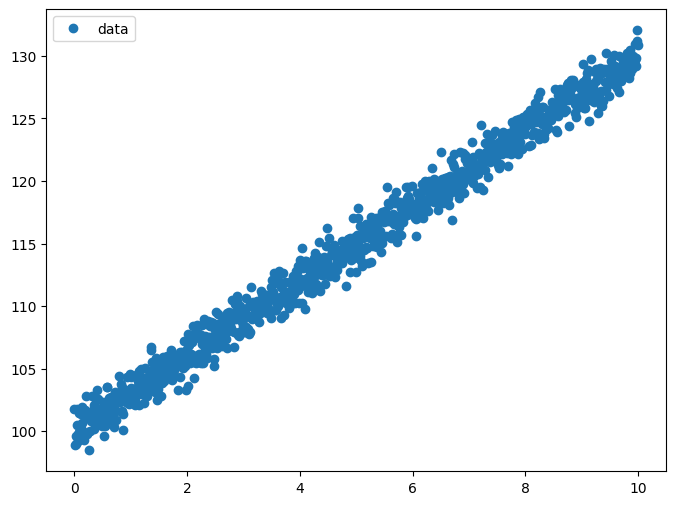

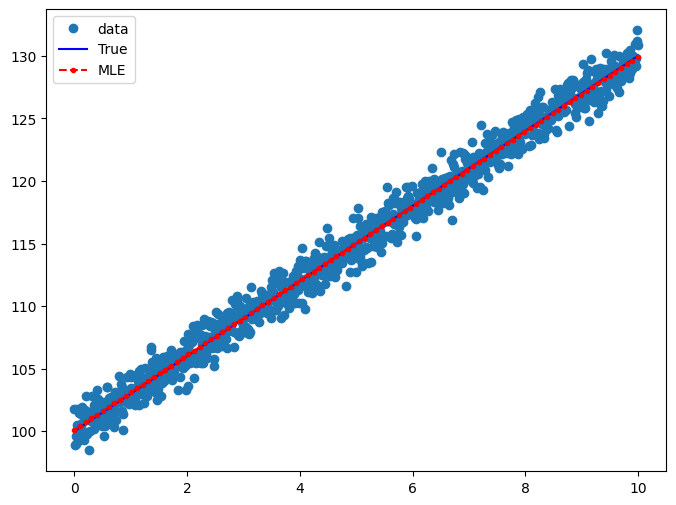

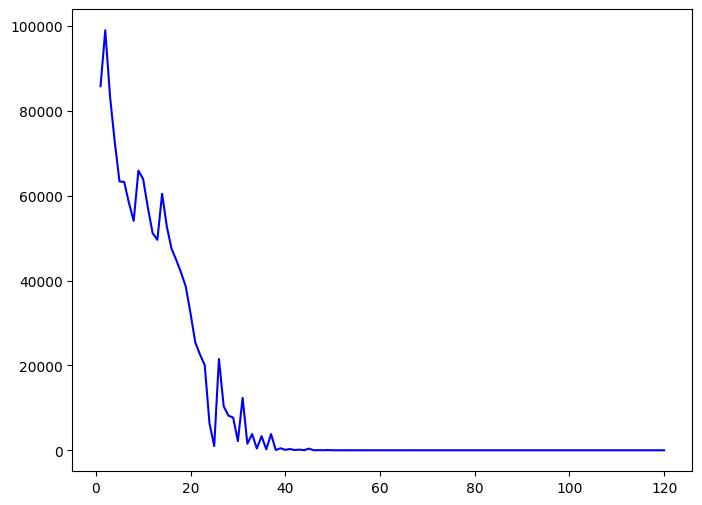

In [153]:
mse_value = []

def get_data(nsamples: int = 1000) -> Tuple[np.array, np.array]:
    x = np.linspace(0, 10, nsamples)
    y = 3 * x + 100
    return (x, y)


def add_noise(y: np.array) -> np.array:
    noise = np.random.normal(size=y.size)
    return y + noise


def mse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MSE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    y_hat = m * x + b
    mse = (np.square(y - y_hat)).mean()  
    mse_value.append(mse)
    return mse

if __name__ == "__main__":
    # Getting data
    x, y_true = get_data()
    y = add_noise(y_true)

    # Plot and investigate data
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.legend(loc="best")

    # Initial guess of the parameters: [2, 2] (m, b).
    # It doesn’t have to be accurate but simply reasonable.
    initial_guess = np.array([100, -300])

    # Maximizing the probability for point to be from the distribution
    results = minimize(
        mse_regression,
        initial_guess,
        args=(x, y,),
        method="Nelder-Mead",
        options={"disp": True},)
    print(results)
    print("Parameters: ", results.x)

    # Plot results
    xx = np.linspace(np.min(x), np.max(x), 100)
    yy = results.x[0] * xx + results.x[1]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(x, y_true, "b-", label="True")
    ax.plot(xx, yy, "r--.", label="MLE")
    ax.legend(loc="best")
    mse_number = [i for i in range(1, len(mse_value)+1)]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(mse_number, mse_value, "b-", label="MSE steps")
    plt.savefig("MSE_steps_huge_guess.png")

# Результат третього тесту

Змінивши початкову здогадку на нереалістично велику, функції стає складніше стати на правильний шлях.

Роблячи великі початкові кроки, вони постіперескакує межу правильної відповіді.

**Четвертий тест**

Optimization terminated successfully.
         Current function value: 0.948352
         Iterations: 4
         Function evaluations: 93
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.9483515659543943
       x: [ 3.011e+00  9.995e+01]
     nit: 4
   direc: [[-3.666e+01  9.914e+01]
           [-3.489e+00  3.013e+01]]
    nfev: 93
Parameters:  [ 3.01117118 99.9549573 ]


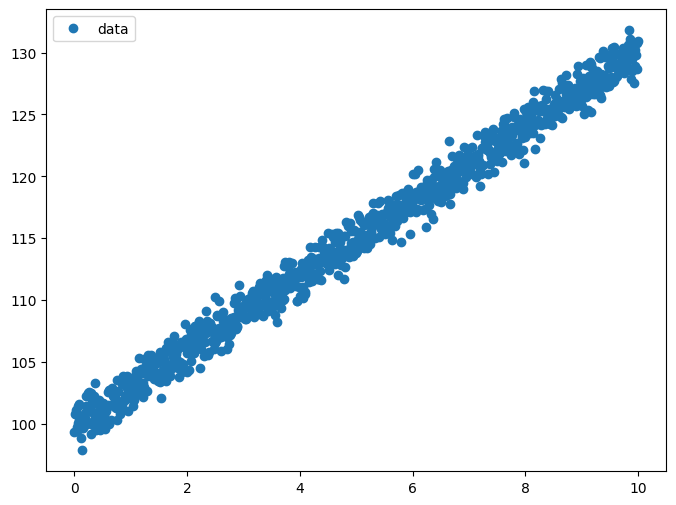

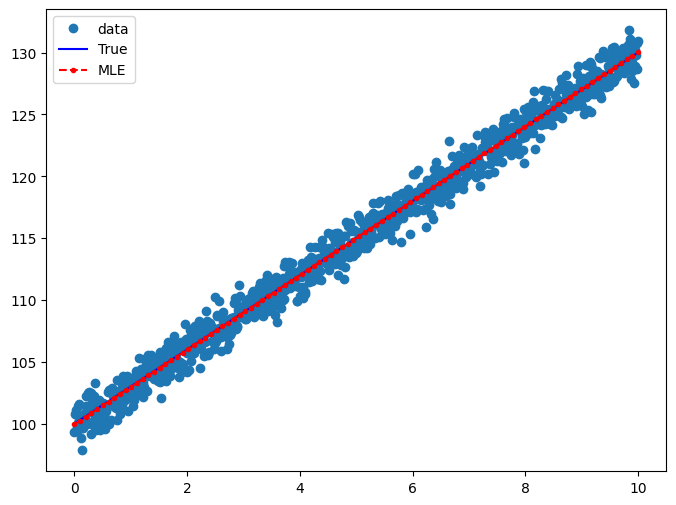

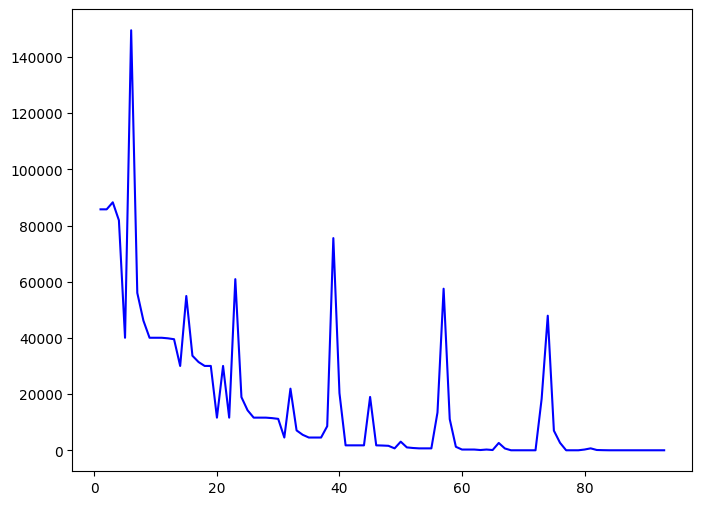

In [154]:
mse_value = []

def get_data(nsamples: int = 1000) -> Tuple[np.array, np.array]:
    x = np.linspace(0, 10, nsamples)
    y = 3 * x + 100
    return (x, y)


def add_noise(y: np.array) -> np.array:
    noise = np.random.normal(size=y.size)
    return y + noise


def mse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MSE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    y_hat = m * x + b
    mse = (np.square(y - y_hat)).mean()  
    mse_value.append(mse)
    return mse

if __name__ == "__main__":
    # Getting data
    x, y_true = get_data()
    y = add_noise(y_true)

    # Plot and investigate data
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.legend(loc="best")

    # Initial guess of the parameters: [2, 2] (m, b).
    # It doesn’t have to be accurate but simply reasonable.
    initial_guess = np.array([100, -300])

    # Maximizing the probability for point to be from the distribution
    results = minimize(
        mse_regression,
        initial_guess,
        args=(x, y,),
        method="Powell",
        options={"disp": True},)
    print(results)
    print("Parameters: ", results.x)

    # Plot results
    xx = np.linspace(np.min(x), np.max(x), 100)
    yy = results.x[0] * xx + results.x[1]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(x, y_true, "b-", label="True")
    ax.plot(xx, yy, "r--.", label="MLE")
    ax.legend(loc="best")
    mse_number = [i for i in range(1, len(mse_value)+1)]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(mse_number, mse_value, "b-", label="MSE steps")
    plt.savefig("MSE_steps_powell.png")

Optimization terminated successfully.
         Current function value: 0.859113
         Iterations: 4
         Function evaluations: 116
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.859113445726731
       x: [ 2.026e+00  3.338e+00]
     nit: 4
   direc: [[-3.056e-01  2.414e-01]
           [-2.925e-01  2.053e+00]]
    nfev: 116
Parameters:  [2.02613109 3.33823248]


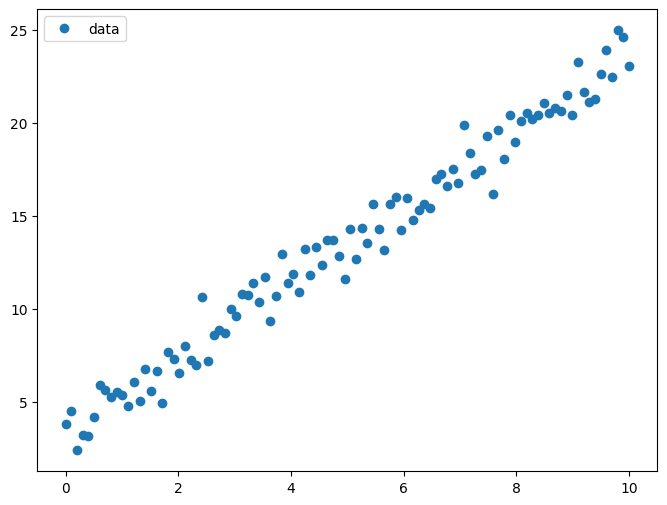

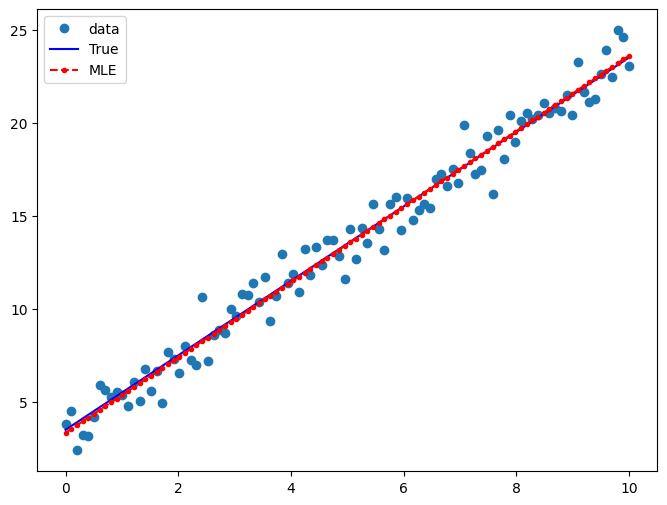

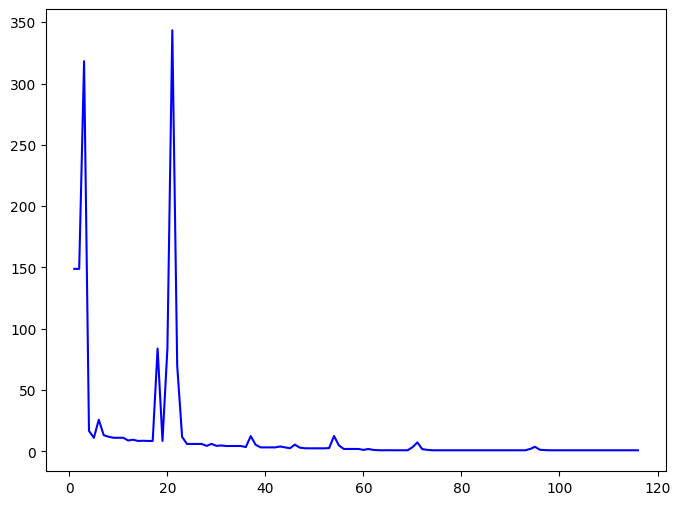

In [156]:
mse_value = []

def get_data(nsamples: int = 100) -> Tuple[np.array, np.array]:
    x = np.linspace(0, 10, nsamples)
    y = 2 * x + 3.5
    return (x, y)


def add_noise(y: np.array) -> np.array:
    noise = np.random.normal(size=y.size)
    return y + noise


def mse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MSE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    y_hat = m * x + b
    mse = (np.square(y - y_hat)).mean()  
    mse_value.append(mse)
    return mse


if __name__ == "__main__":
    # Getting data
    x, y_true = get_data()
    y = add_noise(y_true)

    # Plot and investigate data
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.legend(loc="best")

    # Initial guess of the parameters: [2, 2] (m, b).
    # It doesn’t have to be accurate but simply reasonable.
    initial_guess = np.array([5, -3])

    # Maximizing the probability for point to be from the distribution
    results = minimize(
        mse_regression,
        initial_guess,
        args=(x, y,),
        method="Powell",
        options={"disp": True},)
    print(results)
    print("Parameters: ", results.x)

    # Plot results
    xx = np.linspace(np.min(x), np.max(x), 100)
    yy = results.x[0] * xx + results.x[1]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(x, y_true, "b-", label="True")
    ax.plot(xx, yy, "r--.", label="MLE")
    ax.legend(loc="best")
    mse_number = [i for i in range(1, len(mse_value)+1)]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(mse_number, mse_value, "b-", label="MSE steps")
    plt.savefig("MSE_steps_powell_i.png")

Optimization terminated successfully.
         Current function value: 0.012043
         Iterations: 4
         Function evaluations: 120
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.012042511609188308
       x: [ 2.939e+00  4.555e+00]
     nit: 4
   direc: [[-6.762e-01  1.770e+00]
           [-1.470e-02  1.764e-01]]
    nfev: 120
Parameters:  [2.93853512 4.55533011]


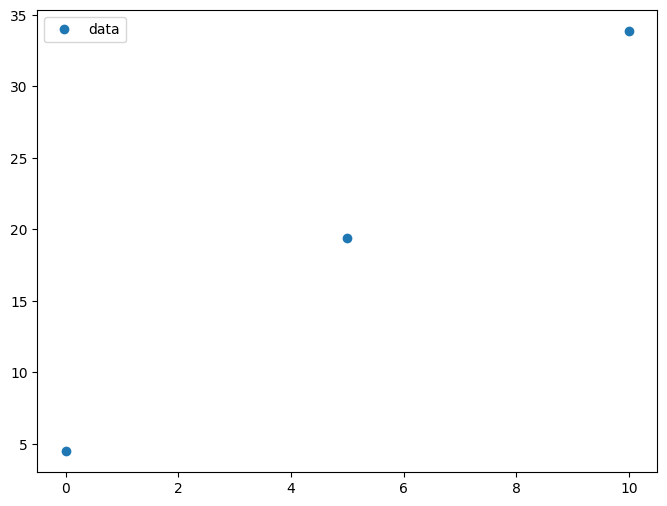

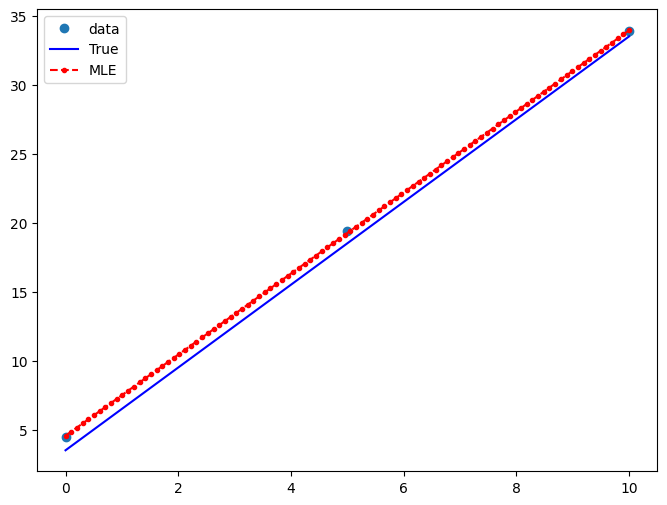

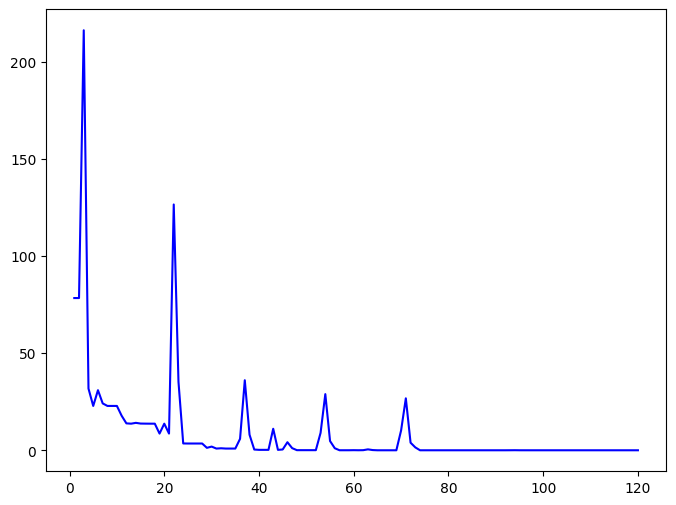

In [158]:
mse_value = []

def get_data(nsamples: int = 3) -> Tuple[np.array, np.array]:
    x = np.linspace(0, 10, nsamples)
    y = 3 * x + 3.5
    return (x, y)


def add_noise(y: np.array) -> np.array:
    noise = np.random.normal(size=y.size)
    return y + noise


def mse_regression(guess: np.array, x: np.array, y: np.array) -> float:
    """MSE Minimization Regression"""
    m = guess[0]
    b = guess[1]
    y_hat = m * x + b
    mse = (np.square(y - y_hat)).mean()  
    mse_value.append(mse)
    return mse


if __name__ == "__main__":
    # Getting data
    x, y_true = get_data()
    y = add_noise(y_true)

    # Plot and investigate data
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.legend(loc="best")

    # Initial guess of the parameters: [2, 2] (m, b).
    # It doesn’t have to be accurate but simply reasonable.
    initial_guess = np.array([5, -3])

    # Maximizing the probability for point to be from the distribution
    results = minimize(
        mse_regression,
        initial_guess,
        args=(x, y,),
        method="Powell",
        options={"disp": True},)
    print(results)
    print("Parameters: ", results.x)

    # Plot results
    xx = np.linspace(np.min(x), np.max(x), 100)
    yy = results.x[0] * xx + results.x[1]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, "o", label="data")
    ax.plot(x, y_true, "b-", label="True")
    ax.plot(xx, yy, "r--.", label="MLE")
    ax.legend(loc="best")
    mse_number = [i for i in range(1, len(mse_value)+1)]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(mse_number, mse_value, "b-", label="MSE steps")
    plt.savefig("MSE_few_samples.png")

# Результат четвертого тесту

З експерементів можемо бачити, що метод Powell працює швидше.

У випадку зі стандартними даними та зі зміненою кількістю семплів, зміненим рівнем шума, та нереалістичною здогадкую, цей метод прораховую мінімальну похибку
за 4 ітерації та приблизно 105 вираховувань. 

Проте ми також можемо бачити відмість принципу роботи цього методу. Він схильний до великих кроків.

Якщо попередній метод переходив на малі кроки в першій половині графіку, то Powell скаче через межу правильної відповіді майже до самого кінця графіку. 

Також на третьому етапі експеремента спостерігаємо мінімізацію відносно далеку від істиних даних, так як в нас всього три семпла.

# Висновки експерементів

З вище виконаних експерементів, можемо бачити:

1) Різні моделі працюють за різними принципами, з різною швидкість, але при однакових данних видають однакові результати
2) Кількість семплів має бути достатньою, щоб функція мала змогу робити кроки в різні сторони. Але також забагато семплів не має сенсу, в такому випадку більшу частину часу функія скаче майже на одному місці. Для наших експеременті оптимальною кількістю семплів є 50-1000
3) Велику роль грає початкова здогадка. Надавання адекватні вірогідні данні, значно скорочує час роботи функції